# Asking salient questions

Now that we can generate the concept map, and calculate the cognitive load per sentence, let's display text blurbs in order of increasing cognitive load as we traverse the created learning path. Based on the blurbs, we will ask questions of the student that are multiple choice. The answers will be passed through a basic inference engine. 

The questions are designed to fill general schema for different entity types in the STEM domain. Relationships are defined based on the roles these entities play. A memory map will be simulated for the student, and review and follow-up questions will be asked based on the memory map for that student. 

Further work will be done for more intelligent question asking, and being able to prompt critical and creative thinking, through relationship extraction and entity detection models. Directing and/or exploring based on learning goals defined based on Bloom's taxonomy will also be done. 


In [4]:
import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

filename = 'Fundamental Concepts in Heterogeneous Catalysis'

concepts = {}
import pickle
# Loading extracted concepts from file (see concept_extraction.ipynb)
#concepts = {'sents':sents,'rawtxt':rawtxt,'sent_to_npflat':sent_to_npflat,'sent_to_tags':sent_to_tags,'sent_to_ltags':sent_to_ltags,'np_to_sent':np_to_sent,'Conceptdata':Conceptdata}
with open(filename +'concepts.pickle', 'rb') as f:
    concepts = pickle.load(f)

# Loading idf dictionary (see Build_IDF_dictionary.ipynb)
with open('idf_dict.pickle','rb') as f1:
    idf_dict =pickle.load(f1)

sents = concepts['sents']
rawtxt = concepts['rawtxt']
sent_to_npflat = concepts['sent_to_npflat']
sent_to_tags= concepts['sent_to_tags']
sent_to_ltags = concepts['sent_to_ltags']
np_to_sent = concepts['np_to_sent']
Conceptdata = concepts['Conceptdata']

import math



def get_idf(wrd,totaldocs=10788):
    wrd = wrd.lower()
    return idf_dict.get(wrd,math.log(totaldocs))


In [5]:
def calc_cl_per_sentence(sent_to_npflat,maxidf=9.1):
    sent_to_clt = []
    for i in range(len(sent_to_npflat)):
        npinsent = sent_to_npflat[i]
        clt= 0
        for np in npinsent:
            tokens = np.split(' ')
            idf = 0
            for t in tokens:
                if t not in stop_words:
                    idf = idf + get_idf(t)/len(tokens)
            if (idf>=maxidf):
                clt = clt + 1
        sent_to_clt.append(clt)
    return sent_to_clt

def plot_clt():
    
    from matplotlib import pyplot as plt
    plt.xlabel('document sentence #')
    plt.ylabel('Load added to working memory by sentence')
    plt.title('Cognitive Load for '+filename)
    plt.plot(list(range(1,len(sent_to_npflat)+1)),calc_cl_per_sentence(sent_to_npflat),drawstyle='steps')
    plt.savefig('cltfig1.png')
    return None

Mininum cognitive load sentence:  ﻿The discovery and development of efficient chemical reactions and processes converting fossil resources into a broad range of fuels and chemicals is one of the most significant scientific developments in chemistry so far.
Maximum cognitive load sentence:  IndexActivity mapAdsorbate–adsorbate interactionsAdsorptionentropyequilibriaisothermsApparent activation energyArrhenius expressionBand diagramBEP relationsBoltzmannconstantdistributionformulaBorn–Oppenheimer approximationCatAppCauchy principle valueChemisorptionConfigurational entropyCoupling matrix elementd-bandcentermodeld-projected density of statesDegree of structure sensitivityDensity of statesDiffusionDipole momentEigenstatesEigenvaluesElectrochemical cellElectrostatic potentialEley–RidealEquilibrium constantExchange–correlation energyExternal potential Fermi levelFrozen density approximationGibbs free energydiagramHarmonic transition state theory (HTST)Heat capacityHeisenberg uncertainty prin

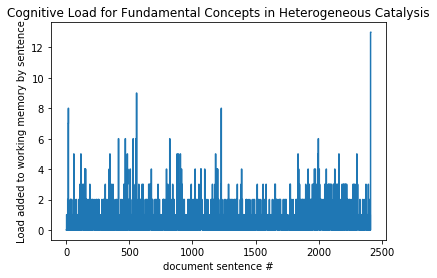

In [6]:
sent_to_clt = calc_cl_per_sentence(sent_to_npflat)
print('Mininum cognitive load sentence: ',sents[sent_to_clt.index(min(sent_to_clt))])
print('Maximum cognitive load sentence: ',sents[sent_to_clt.index(max(sent_to_clt))])
plot_clt()

Functions to get blurbs for two concepts


In [8]:
def get_sentence_indices(np1,np2,max_distance=3):
    sents1 = np_to_sent[np1]
    sents2 = np_to_sent[np2]
    ind1 = 0
    ind2 = 0
    tuplist = []
    lensents1 = len(sents1)
    print(lensents1)
    lensents2 = len(sents2)
    print(lensents2)
    while(ind1<lensents1 and ind2 <lensents2):
        #print(ind1,ind2)
        if (sents1[ind1]<sents2[ind2]):
            #print('sent1 less than sent2')
            if sents2[ind2]-sents1[ind1]<=max_distance:
                tuplist.append((sents1[ind1],sents2[ind2]))
                ind1 = ind1+1
                ind2 = ind2 + 1
            else:
                #ind1 = bs.bisect_left(sents1,sents2[ind2])
                ind1 = ind1 + 1
        elif (sents1[ind1]>sents2[ind2]):
            #print('sent2 less than sent1')
            if sents1[ind1]-sents2[ind2] <= max_distance:
                tuplist.append((sents2[ind2],sents1[ind1]))
                ind1 = ind1 + 1
                ind2 = ind2 + 1
            else:
                #ind2 = bs.bisect_left(sents2,sents1[ind1])
                ind2 = ind2 + 1
        else:
            tuplist.append((sents1[ind1],sents2[ind2]))
            ind1 = ind1+1
            ind2 = ind2+1
    return tuplist

def get_blurbs(np1,np2,max_distance=3):
    blurblist = []
    tuplist = get_sentence_indices(np1,np2,max_distance)
    print(tuplist)
    for t in tuplist:
        blurb = []
        print(t)
        blurb = ' '.join(sents[t[0]:t[1]+1]).replace('\n', ' ').replace('\r', '')
        print(blurb)
        blurblist.append(blurb)
    return tuplist, blurblist

In [19]:
tuplist, blurblist = get_blurbs('structure','f',1)

22
18
[(2391, 2391)]
(2391, 2391)
Given the value of the coupling strength V , the renormalized energy level ε a , and the structure Δ(ε ) and filling f of the band, we can determine the total energy.
